**Image Recognition**

In [2]:
print("Hello World")

Hello World


In [3]:
from fastai.vision import *

In [4]:
def download_image(url,dest, timeout=4):
    try: r = download_url(url, dest, overwrite=True, show_progress=False, timeout=timeout)
    except Exception as e: print(f"Error {url} {e}")

def _download_image_inner(dest, url, i, timeout=4):
    suffix = re.findall(r'\.\w+?(?=(?:\?|$))', url)
    suffix = suffix[0] if len(suffix)>0  else '.jpg'
    download_image(url, dest/f"{i:08d}{suffix}", timeout=timeout)

def download_images(urls:Union[Path, str], dest:PathOrStr, max_pics:int=1000, max_workers:int=8, timeout=4):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    urls = list(filter(None, open(urls).read().strip().split("\n")))[:max_pics]       
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    parallel(partial(_download_image_inner, dest, timeout=timeout), urls, max_workers=max_workers)
    
def download_url(url:str, dest:str, overwrite:bool=False, pbar:ProgressBar=None,
                 show_progress=False, chunk_size=1024*1024, timeout=4, retries=5)->None:
    "Download `url` to `dest` unless it exists and not `overwrite`."
    if os.path.exists(dest) and not overwrite: return

    s = requests.Session()
    s.mount('http://',requests.adapters.HTTPAdapter(max_retries=retries))
    # additional line to identify as a firefox browser, see #2438
    s.headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}) 
    u = s.get(url, stream=True, timeout=timeout, verify=False)
    try: file_size = int(u.headers["Content-Length"])
    except: show_progress = False

    with open(dest, 'wb') as f:
        nbytes = 0
        if show_progress: pbar = progress_bar(range(file_size), leave=False, parent=pbar)
        try:
            if show_progress: pbar.update(0)
            for chunk in u.iter_content(chunk_size=chunk_size):
                nbytes += len(chunk)
                if show_progress: pbar.update(nbytes)
                f.write(chunk)
        except requests.exceptions.ConnectionError as e:
            fname = url.split('/')[-1]
            from fastai.datasets import Config
            data_dir = Config().data_path()
            timeout_txt =(f'\n Download of {url} has failed after {retries} retries\n'
                          f' Fix the download manually:\n'
                          f'$ mkdir -p {data_dir}\n'
                          f'$ cd {data_dir}\n'
                          f'$ wget -c {url}\n'
                          f'$ tar -zxvf {fname}\n\n'
                          f'And re-run your code once the download is successful\n')
            print(timeout_txt)
            import sys;sys.exit(1)

# Download Images

In [12]:
path = Path('C:/Users/w290705/Desktop/MachineLearningProjs/cycle_motorcycles_data/data')

In [6]:
folder = 'cycles'
file = 'cycles.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200, max_workers=0)


C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

In [7]:
folder = 'motorcycles'
file = 'motorcycles.csv'

dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200, max_workers=0)

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\w290705\AppData\Roaming\Python\Python37\sit

# Data

In [14]:
# 1. These must match the folder names
# 2. note: these folders should be inside new 'data' folder
classes = ['cycles','motorcycles']

In [15]:
# Arrange the images for processing
# Take 20% (valid_pct) and "Hide it" from training - The 20% of the images will be used to check how good the classifier is
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", bs=4, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cycles', 'motorcycles'], 2, 320, 80)

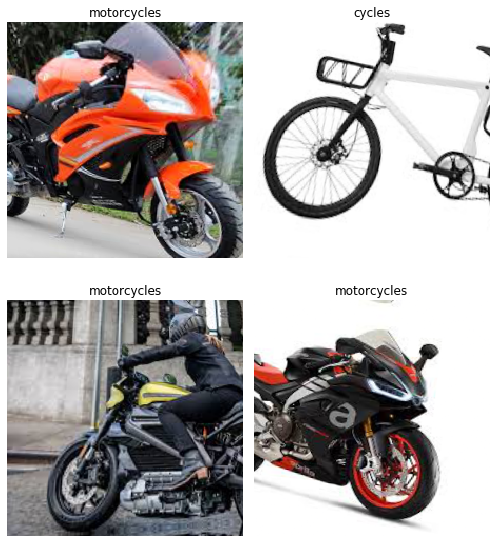

In [17]:
data.show_batch(rows=3, figsize=(7,8))

# Train

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\w290705/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [19]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.667973,0.200282,0.075000,01:53
1,0.743016,0.361146,0.125000,01:51
2,0.668144,0.129285,0.062500,01:54
3,0.598066,0.163581,0.050000,01:55
4,0.512500,0.100193,0.025000,02:09


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

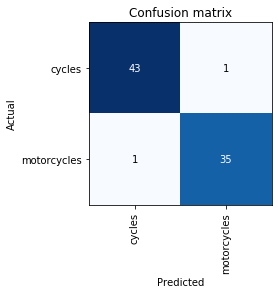

In [21]:
interp.plot_confusion_matrix()

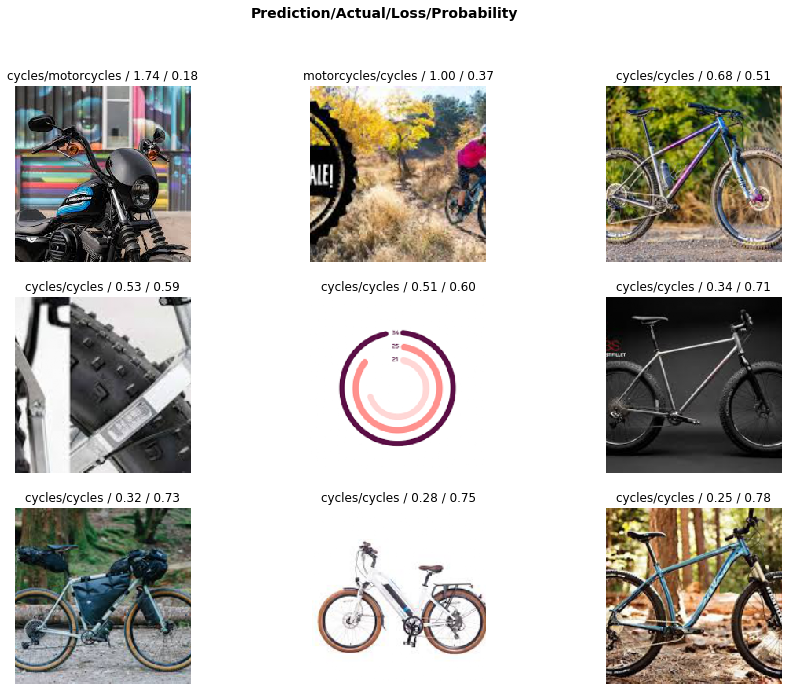

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

# Let's see if we can make it better

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


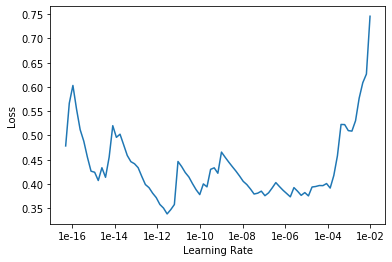

In [26]:
# If the plot is not showing try to give a start and end learning rate
learn.lr_find(start_lr=1e-18, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, max_lr=slice(3e-11,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.442547,0.142523,0.062500,02:13
1,0.489719,0.171963,0.100000,02:19
2,0.412054,0.092508,0.025000,02:15
3,0.473666,0.131983,0.062500,02:14
4,0.442437,0.208917,0.050000,02:13
5,0.372768,0.073666,0.012500,02:13
6,0.484172,0.189987,0.062500,02:14
7,0.552695,0.133654,0.037500,02:15
8,0.617507,0.167933,0.087500,02:14
9,0.453446,0.096297,0.025000,02:19


In [ ]:
learn.recorder.plot_losses()
learn.recorder.plot_lr(show_moms=True)
if len(learn.recorder.metrics)>0: learn.recorder.plot_metrics()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))